# ## Lead Score - Case Study

# PROBLEM STATEMENT
X Education wants to select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires to build a model whereina score needs to be to assigned- a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance.

In [ ]:
#NECESSARY LIBRARIES
import warnings
warnings.filterwarnings('ignore')

In [307]:
import pandas as pd
import numpy as np
# Data Visualisation
import matplotlib.pyplot as plt 
import seaborn as sns

In [308]:
#READ THE FILE
Leads= pd.read_csv("Leads.csv")
Leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [309]:
Leads.shape

(9240, 37)

In [310]:
Leads.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [311]:
Leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [312]:
round(100*(Leads.isnull().sum()/len(Leads.index)), 2)


Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [313]:
Leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [314]:
# List of variables to map
var_map=['A free copy of Mastering The Interview','I agree to pay the amount through cheque',
'Get updates on DM Content' , 'Update me on Supply Chain Content',
'Newspaper Article', 'X Education Forums','Newspaper', 'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
'Search','Magazine',
'Do Not Email' ,'Do Not Call']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
Leads[var_map] = Leads[var_map].apply(binary_map)

In [315]:
Leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,...,0,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,...,0,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,...,0,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,...,0,Select,Mumbai,02.Medium,01.High,13.0,17.0,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,...,0,Select,Mumbai,02.Medium,01.High,15.0,18.0,0,0,Modified


In [316]:
# Replacing 'Select' with NaN 
Leads=Leads.replace('Select',np.nan)


In [317]:
# Checking the percentage of missing values
round(100*(Leads.isnull().sum()/len(Leads.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [318]:
Leads.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

# Checking other important variables in the csv to either impute /drop


In [319]:
Leads['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

since 90% of data is a unique value this column can be deleted

In [320]:
Leads['Lead Quality'].value_counts()

Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

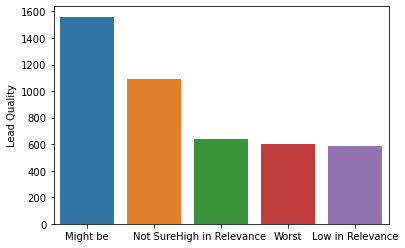

In [321]:
sns.barplot(x=Leads['Lead Quality'].value_counts().index, y=Leads['Lead Quality'].value_counts())
plt.show()

In [322]:
Leads['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

since more than 80% of country is India, this column can be deleted

In [323]:
Leads['Specialization'].value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

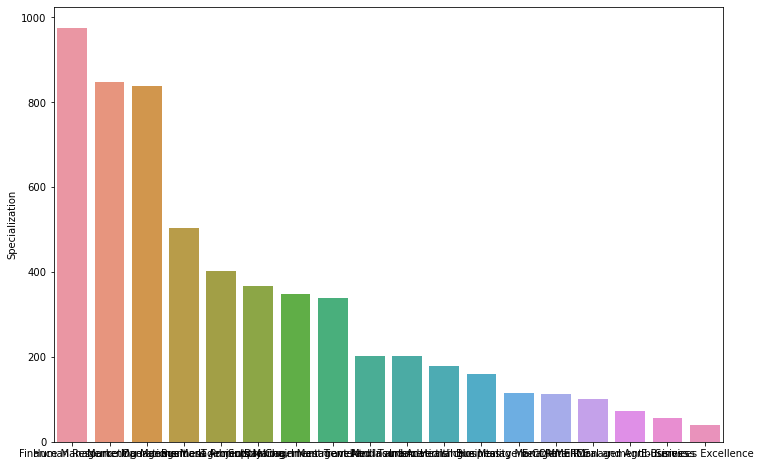

In [324]:
plt.figure(figsize = (12,8))
sns.barplot(x=Leads['Specialization'].value_counts().index, y=Leads['Specialization'].value_counts())
plt.show()

In [325]:
Leads['City'].value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

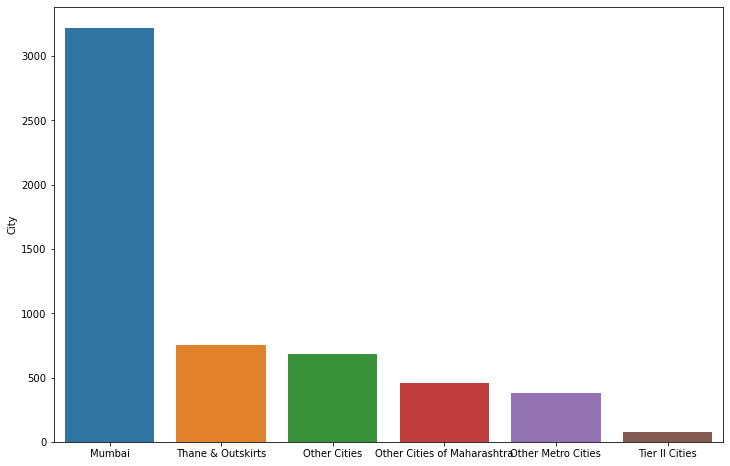

In [326]:
plt.figure(figsize = (12,8))
sns.barplot(x=Leads['City'].value_counts().index, y=Leads['City'].value_counts())
plt.show()

In [327]:
Leads['Tags'].value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [328]:
Leads['Tags'] = Leads['Tags'].replace([  'Lost to Others'                                         
'Still Thinking',                                         
'Want to take admission but has financial problems',      
'In confusion whether part time or DLP',             
'Interested in Next batch',                             
'Lateral student' ,                                    
'Shall take in the next coming month'                     
'University not recognized'                               
'Recognition issue (DEC approval)'                                        
], 'Others')


In [329]:
Leads["Last Notable Activity"].value_counts()

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [330]:

Leads['Last Notable Activity'] = Leads['Last Notable Activity'].replace([ 'Email Marked Spam',                 
'Approached upfront',               
'Resubscribed to emails',       
'View in browser link Clicked',      
'Form Submitted on Website'    ,     
'Email Received'], 'Others')

In [331]:
Leads["Last Activity"].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [332]:
Leads['Last Activity'] = Leads['Last Notable Activity'].replace([ 'Had a Phone Conversation',          
'Approached upfront',                 
'View in browser link Clicked',     
'Email Received',                     
'Email Marked Spam',                  
'Visited Booth in Tradeshow',         
'Resubscribed to emails'], 'Others')

In [333]:
Leads["Lead Source"].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [334]:
Leads['Lead Source'] = Leads['Lead Source'].replace(['google'], 'Google')
Leads['Lead Source'] = Leads['Lead Source'].replace([ 'blog', 'Pay per Click Ads', 'bing', 'Social Media', 'WeLearn', 
                                                  'Click2call', 'Live Chat','welearnblog_Home', 'youtubechannel', 'testone', 
                                                   'Press_Release', 'NC_EDM','Null'], 'Other_Platforms')

In [335]:
Leads['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

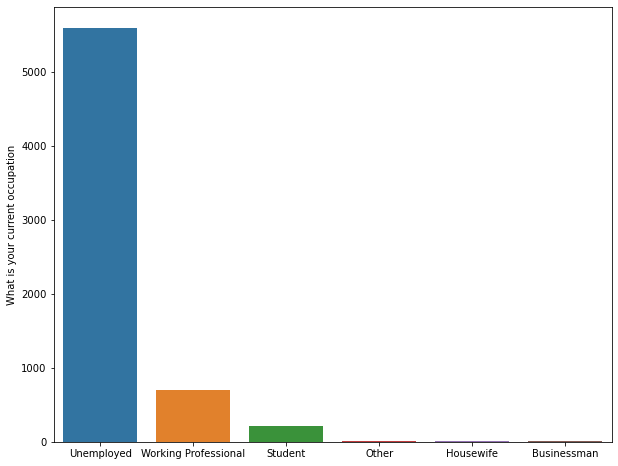

In [336]:

plt.figure(figsize = (10,8))
sns.barplot(x=Leads['What is your current occupation'].value_counts().index, y=Leads['What is your current occupation'].value_counts())
plt.show()

In [337]:
    Leads['What is your current occupation'] = Leads['What is your current occupation'].replace(['Housewife','Businessman'], 'Other ')

In [338]:
Leads['Specialization'] = Leads['Specialization'].fillna('not selected') 
Leads['Tags'] = Leads['Tags'].fillna('not sure') 

In [339]:
Leads['What is your current occupation']=Leads['What is your current occupation'].fillna(Leads['What is your current occupation'].mode()[0])
Leads['City']=Leads['City'].fillna(Leads['City'].mode()[0])
Leads['Lead Quality']=Leads['Lead Quality'].fillna(Leads['Lead Quality'].mode()[0])

Droping all variables that have null values greater than 50% and 
columns that have only one unique variable since it does not add any value to the model.Also drop the unimportant columns

In [340]:
Leads=Leads.drop(['Magazine','Receive More Updates About Our Courses','I agree to pay the amount through cheque',
                 'Asymmetrique Activity Index','Asymmetrique Activity Score','Country', 'Lead Profile','Prospect ID',
                    'Asymmetrique Profile Index','Asymmetrique Profile Score','Get updates on DM Content',
                 'Update me on Supply Chain Content','How did you hear about X Education','What matters most to you in choosing a course'],axis=1)

In [341]:
# Checking the percentage of missing values
round(100*(Leads.isnull().sum()/len(Leads.index)), 2)

Lead Number                               0.00
Lead Origin                               0.00
Lead Source                               0.39
Do Not Email                              0.00
Do Not Call                               0.00
Converted                                 0.00
TotalVisits                               1.48
Total Time Spent on Website               0.00
Page Views Per Visit                      1.48
Last Activity                             0.00
Specialization                            0.00
What is your current occupation           0.00
Search                                    0.00
Newspaper Article                         0.00
X Education Forums                        0.00
Newspaper                                 0.00
Digital Advertisement                     0.00
Through Recommendations                   0.00
Tags                                      0.00
Lead Quality                              0.00
City                                      0.00
A free copy o

In [342]:
Leads=Leads.dropna()

In [343]:
Leads.isnull().sum()

Lead Number                               0
Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Do Not Call                               0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
Search                                    0
Newspaper Article                         0
X Education Forums                        0
Newspaper                                 0
Digital Advertisement                     0
Through Recommendations                   0
Tags                                      0
Lead Quality                              0
City                                      0
A free copy of Mastering The Interview    0
Last Notable Activity           

In [344]:
Leads.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,Lead Quality,City,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Modified,...,0,0,0,0,0,Interested in other courses,Low in Relevance,Mumbai,0,Modified
1,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,...,0,0,0,0,0,Ringing,Might be,Mumbai,0,Email Opened
2,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,...,0,0,0,0,0,Will revert after reading the email,Might be,Mumbai,1,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Modified,...,0,0,0,0,0,Ringing,Not Sure,Mumbai,0,Modified
4,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Modified,...,0,0,0,0,0,Will revert after reading the email,Might be,Mumbai,0,Modified


# Checking for outliers

In [345]:
num_leads = Leads[['Total Time Spent on Website','Page Views Per Visit','TotalVisits']]
num_leads.describe(percentiles=[.25, .5, .75, .90, .95, .99])


,Total Time Spent on Website,Page Views Per Visit,TotalVisits
count,9074.000000,9074.000000,9074.000000
mean,482.887481,2.370151,3.456028
std,545.256560,2.160871,4.858802
min,0.000000,0.000000,0.000000
25%,11.000000,1.000000,1.000000
50%,246.000000,2.000000,3.000000
75%,922.750000,3.200000,5.000000
90%,1373.000000,5.000000,7.000000
95%,1557.000000,6.000000,10.000000
99%,1839.000000,9.000000,17.000000


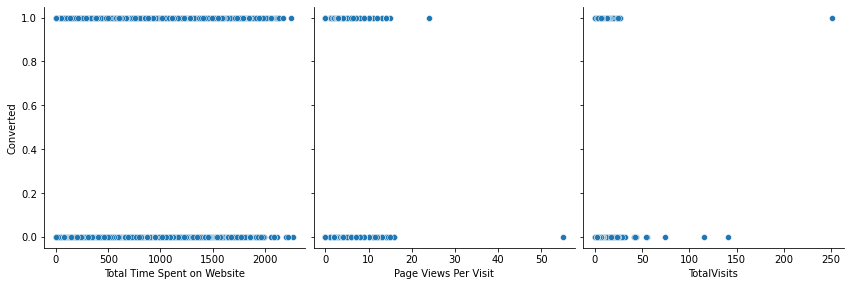

In [346]:
sns.pairplot(Leads, x_vars=['Total Time Spent on Website','Page Views Per Visit','TotalVisits'], y_vars='Converted',size=4, aspect=1, kind='scatter')
plt.show()

# correlation

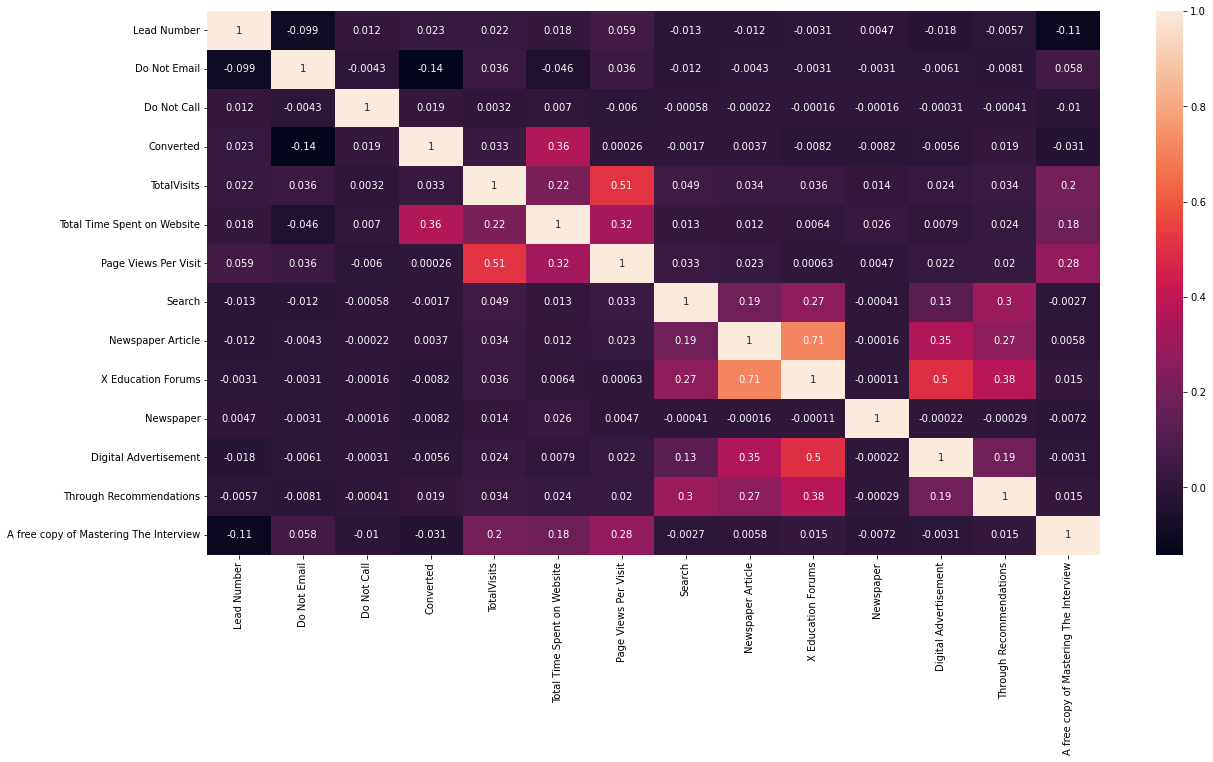

In [347]:
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(Leads.corr(),annot = True)
plt.show()

In [348]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
lead_dummies=pd.get_dummies(Leads[['Lead Source','Last Activity','Specialization',
                            'What is your current occupation','Tags','Lead Origin',
                             'Lead Quality','City','Last Notable Activity']], drop_first=True)





In [349]:
#drop the variables for which dummy was created
Leads=Leads.drop(['Lead Source','Last Activity','Specialization',
                            'What is your current occupation','Tags','Lead Origin',
                             'Lead Quality','City','Last Notable Activity'], axis=1)


In [350]:
Leads= pd.concat([Leads,lead_dummies], axis=1)

In [351]:
Leads.head()

,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,...,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
0,660737,0,0,0,0.0,0,0.0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,660728,0,0,0,5.0,674,2.5,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,660727,0,0,1,2.0,1532,2.0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,660719,0,0,0,1.0,305,1.0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,660681,0,0,1,2.0,1428,1.0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


# test and train

In [352]:
from sklearn.model_selection import train_test_split

In [353]:
# Putting feature variable to X
X = Leads.drop(['Converted','Lead Number'], axis=1)

X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,...,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [354]:
# Putting response variable to y
y = Leads['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [355]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [356]:
from sklearn.preprocessing import StandardScaler

In [357]:
scaler = StandardScaler()

X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,...,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
3009,0,0,-0.284595,-0.160255,-0.179666,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1012,1,0,-0.284595,-0.540048,-0.179666,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9226,0,0,-0.671384,-0.888650,-1.132538,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4750,0,0,-0.284595,1.643304,-0.179666,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7987,0,0,0.295588,2.017593,0.058552,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [358]:
#Converted rate

convert_rate= (sum(Leads['Converted'])/len(Leads['Converted'].index))*100
convert_rate

37.85541106458012

###  Model Building
Let's start by splitting our data into a training set and a test set.

In [359]:
import statsmodels.api as sm

In [360]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6263
Model Family:                Binomial   Df Model:                           87
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 11 Apr 2022   Deviance:                       69336.
Time:                        22:39:08   Pearson chi2:                 3.39e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                 1.957e+14   2.52e+07   7.77e+06      0.000    1.96e+14    1.96e+14
Do Not Email                                          8.572e+13   3.59e+06   2.39e+07      0.000    8.57e+13    8.57e+13
Do Not Call                                           5.949e+14   4.78e+07   1.25e+07      0.000    5.95e+14    5.95e+14
TotalVisits                                          -1.176e+13   9.97e+05  -1.18e+07      0.000   -1.18e+13   -1.18e+13
Total Time Spent on Website                           2.086e+14      1e+06   2.08e+08      0.000    2.09e+14    2.09e+14
Page Views Per Visit                                 -4.553e+13   1.21e+06  -3.76e+07      0.000   -4.55e+13   -4.55e+13
Search                                                1.444e+14   2.39e+07   6.05e+06      0.000    1.44e+14    1.44e+14
Newspaper Article                                     7.047e+15   6.73e+07   1.05e+08      0.000    7.05e+15    7.05e+15
X Education Forums                                   -1.105e+16   1.13e+08  -9.79e+07      0.000    -1.1e+16    -1.1e+16
Newspaper                                            -1.231e+15   6.73e+07  -1.83e+07      0.000   -1.23e+15   -1.23e+15
Digital Advertisement                                 8.256e+14   4.81e+07   1.72e+07      0.000    8.26e+14    8.26e+14
Through Recommendations                               9.838e+14   3.57e+07   2.75e+07      0.000    9.84e+14    9.84e+14
A free copy of Mastering The Interview                2.404e+13   2.58e+06   9.32e+06      0.000     2.4e+13     2.4e+13
Lead Source_Facebook                                 -7.349e+15   6.79e+07  -1.08e+08      0.000   -7.35e+15   -7.35e+15
Lead Source_Google                                    1.591e+14   2.69e+06    5.9e+07      0.000    1.59e+14    1.59e+14
Lead Source_Olark Chat                                -1.47e+15   3.62e+06  -4.06e+08      0.000   -1.47e+15   -1.47e+15
Lead Source_Organic Search                            -1.13e+14    3.2e+06  -3.54e+07      0.000   -1.13e+14   -1.13e+14
Lead Source_Other_Platforms                           7.854e+14   1.85e+07   4.24e+07      0.000    7.85e+14    7.85e+14
Lead Source_Reference                                -1.842e+14   2.91e+07  -6.34e+06      0.000   -1.84e+14   -1.84e+14
Lead Source_Referral Sites                            6.667e+13   7.84e+06    8.5e+06      0.000    6.67e+13    6.67e+13
Lead Source_Welingak Website                          5.548e+14   2.96e+07   1.88e+07      0.000    5.55e+14    5.55e+14
Last Activity_Email Link Clicked                      1.834e+14   6.16e+06   2.98e+07      0.000    1.83e+14    1.83e+14
Last Activity_Email Opened                           -1.36

###  Feature Selection Using RFE

In [361]:
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
logreg = LogisticRegression()

In [362]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 13 variables as output
rfe = rfe.fit(X_train, y_train)

In [363]:
rfe.support_

array([ True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True, False,
       False, False, False,  True, False, False,  True, False,  True,
       False, False, False,  True, False,  True,  True, False, False,
        True,  True, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False])

In [364]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 75),
 ('TotalVisits', False, 56),
 ('Total Time Spent on Website', False, 4),
 ('Page Views Per Visit', False, 68),
 ('Search', False, 52),
 ('Newspaper Article', False, 78),
 ('X Education Forums', False, 69),
 ('Newspaper', False, 72),
 ('Digital Advertisement', False, 61),
 ('Through Recommendations', False, 79),
 ('A free copy of Mastering The Interview', False, 53),
 ('Lead Source_Facebook', False, 51),
 ('Lead Source_Google', False, 44),
 ('Lead Source_Olark Chat', False, 5),
 ('Lead Source_Organic Search', False, 71),
 ('Lead Source_Other_Platforms', False, 43),
 ('Lead Source_Reference', False, 65),
 ('Lead Source_Referral Sites', False, 55),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Link Clicked', False, 8),
 ('Last Activity_Email Opened', False, 67),
 ('Last Activity_Modified', False, 7),
 ('Last Activity_Olark Chat Conversation', False, 11),
 ('Last Activity_Others', False, 70),
 ('Last Activity_Pag

In [365]:
col = X_train.columns[rfe.support_]

In [366]:
col

Index(['Do Not Email', 'Lead Source_Welingak Website',
       'Last Activity_SMS Sent', 'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Lost to EINS', 'Tags_Others', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_not sure', 'Tags_switched off', 'Tags_wrong number given',
       'Lead Quality_Worst', 'Last Notable Activity_SMS Sent'],
      dtype='object')

In [367]:
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Search', 'Newspaper Article',
       'X Education Forums', 'Newspaper', 'Digital Advertisement',
       'Through Recommendations', 'A free copy of Mastering The Interview',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Other_Platforms',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Modified', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Others', 'Last Activity_Page Visited on Website',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality 

##### Assessing the model with StatsModels

In [368]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 11 Apr 2022   Deviance:                       2775.8
Time:                        22:39:21   Pearson chi2:                 9.00e+03
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -3.4790      0.207    -16.772      0.000      -3.886      -3.072
Do Not Email                                -1.3313      0.238     -5.596      0.000      -1.798      -0.865
Lead Source_Welingak Website                 3.8339      0.926      4.138      0.000       2.018       5.650
Last Activity_SMS Sent                    8.134e+05      0.062    1.3e+07      0.000    8.13e+05    8.13e+05
Tags_Busy                                    2.2350      0.310      7.212      0.000       1.628       2.842
Tags_Closed by Horizzon                      7.9332      0.762     10.410      0.000       6.439       9.427
Tags_Lost to EINS                            7.6629      0.684     11.197      0.000       6.322       9.004
Tags_Others                                  3.5119      0.661      5.315      0.000       2.217       4.807
Tags_Ringing                                -1.9384      0.320     -6.062      0.000      -2.565      -1.312
Tags_Will revert after reading the email     6.6029      0.270     24.460      0.000       6.074       7.132
Tags_invalid number                      -4.504e+15   8.81e+06  -5.11e+08      0.000    -4.5e+15    -4.5e+15
Tags_not sure                                1.7284      0.214      8.081      0.000       1.309       2.148
Tags_switched off                           -1.9891      0.554     -3.590      0.000      -3.075      -0.903
Tags_wrong number given                    -34.6173   1.21e+07  -2.87e-06      1.000   -2.36e+07    2.36e+07
Lead Quality_Worst                          -2.0517      0.731     -2.807      0.005      -3.484      -0.619
Last Notable Activity_SMS Sent           -8.134e+05      0.062   -1.3e+07      0.000   -8.13e+05   -8.13e+05
============================================================================================================
"""

In [369]:
col=col.drop("Tags_wrong number given")

In [370]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 11 Apr 2022   Deviance:                       2779.6
Time:                        22:39:22   Pearson chi2:                 9.36e+03
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -3.5881      0.206    -17.387      0.000      -3.993      -3.184
Do Not Email                                -1.3500      0.234     -5.779      0.000      -1.808      -0.892
Lead Source_Welingak Website                 4.7676      0.740      6.446      0.000       3.318       6.217
Last Activity_SMS Sent                       1.4108      0.061     22.960      0.000       1.290       1.531
Tags_Busy                                    2.3546      0.306      7.696      0.000       1.755       2.954
Tags_Closed by Horizzon                      8.2507      0.750     10.995      0.000       6.780       9.721
Tags_Lost to EINS                            7.8622      0.768     10.235      0.000       6.357       9.368
Tags_Others                                  3.2760      0.657      4.988      0.000       1.989       4.563
Tags_Ringing                                -1.8114      0.318     -5.692      0.000      -2.435      -1.188
Tags_Will revert after reading the email     6.7149      0.270     24.883      0.000       6.186       7.244
Tags_invalid number                      -1.803e+05   8.81e+06     -0.020      0.984   -1.75e+07    1.71e+07
Tags_not sure                                1.8401      0.212      8.683      0.000       1.425       2.255
Tags_switched off                           -1.8617      0.560     -3.323      0.001      -2.960      -0.764
Lead Quality_Worst                          -1.8418      0.732     -2.517      0.012      -3.276      -0.407
Last Notable Activity_SMS Sent               1.4109      0.061     22.962      0.000       1.290       1.531
============================================================================================================
"""

In [371]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Last Activity_SMS Sent,inf
13,Last Notable Activity_SMS Sent,inf
8,Tags_Will revert after reading the email,1.35
10,Tags_not sure,1.14
0,Do Not Email,1.11
7,Tags_Ringing,1.10
1,Lead Source_Welingak Website,1.04
3,Tags_Busy,1.04
11,Tags_switched off,1.03
12,Lead Quality_Worst,1.03


In [372]:
col=col.drop('Last Activity_SMS Sent')

In [373]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1389.8
Date:                Mon, 11 Apr 2022   Deviance:                       2779.6
Time:                        22:39:23   Pearson chi2:                 9.37e+03
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -3.5888      0.209    -17.170      0.000      -3.998      -3.179
Do Not Email                                -1.3504      0.236     -5.729      0.000      -1.812      -0.888
Lead Source_Welingak Website                 4.7682      0.737      6.468      0.000       3.323       6.213
Tags_Busy                                    2.3550      0.309      7.622      0.000       1.749       2.961
Tags_Closed by Horizzon                      8.2519      0.740     11.149      0.000       6.801       9.703
Tags_Lost to EINS                            7.8636      0.757     10.387      0.000       6.380       9.347
Tags_Others                                  3.2764      0.660      4.963      0.000       1.982       4.570
Tags_Ringing                                -1.8116      0.318     -5.692      0.000      -2.435      -1.188
Tags_Will revert after reading the email     6.7159      0.271     24.791      0.000       6.185       7.247
Tags_invalid number                        -22.1722   1.47e+04     -0.002      0.999   -2.89e+04    2.89e+04
Tags_not sure                                1.8404      0.214      8.581      0.000       1.420       2.261
Tags_switched off                           -1.8616      0.560     -3.323      0.001      -2.960      -0.763
Lead Quality_Worst                          -1.8419      0.740     -2.490      0.013      -3.292      -0.392
Last Notable Activity_SMS Sent               2.8222      0.124     22.820      0.000       2.580       3.065
============================================================================================================
"""

In [374]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,Last Notable Activity_SMS Sent,1.59
7,Tags_Will revert after reading the email,1.35
9,Tags_not sure,1.14
0,Do Not Email,1.11
6,Tags_Ringing,1.10
1,Lead Source_Welingak Website,1.04
2,Tags_Busy,1.04
10,Tags_switched off,1.03
11,Lead Quality_Worst,1.03
8,Tags_invalid number,1.02


In [375]:
col=col.drop('Tags_invalid number')

In [376]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1395.4
Date:                Mon, 11 Apr 2022   Deviance:                       2790.7
Time:                        22:39:23   Pearson chi2:                 9.35e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -3.7721      0.211    -17.853      0.000      -4.186      -3.358
Do Not Email                                -1.3453      0.235     -5.724      0.000      -1.806      -0.885
Lead Source_Welingak Website                 4.7616      0.737      6.461      0.000       3.317       6.206
Tags_Busy                                    2.5586      0.307      8.325      0.000       1.956       3.161
Tags_Closed by Horizzon                      8.4351      0.741     11.387      0.000       6.983       9.887
Tags_Lost to EINS                            8.0460      0.758     10.619      0.000       6.561       9.531
Tags_Others                                  3.4664      0.659      5.260      0.000       2.175       4.758
Tags_Ringing                                -1.5933      0.316     -5.046      0.000      -2.212      -0.974
Tags_Will revert after reading the email     6.9012      0.272     25.339      0.000       6.367       7.435
Tags_not sure                                2.0329      0.215      9.444      0.000       1.611       2.455
Tags_switched off                           -1.6424      0.559     -2.940      0.003      -2.738      -0.547
Lead Quality_Worst                          -1.8388      0.742     -2.480      0.013      -3.292      -0.385
Last Notable Activity_SMS Sent               2.7819      0.122     22.792      0.000       2.543       3.021
============================================================================================================
"""

In [377]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Last Notable Activity_SMS Sent,1.58
7,Tags_Will revert after reading the email,1.34
8,Tags_not sure,1.14
0,Do Not Email,1.10
6,Tags_Ringing,1.10
1,Lead Source_Welingak Website,1.04
2,Tags_Busy,1.04
9,Tags_switched off,1.03
10,Lead Quality_Worst,1.03
3,Tags_Closed by Horizzon,1.01


In [378]:
col=col.drop('Lead Quality_Worst')

In [379]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6339
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1399.9
Date:                Mon, 11 Apr 2022   Deviance:                       2799.8
Time:                        22:39:24   Pearson chi2:                 9.42e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -4.0431      0.203    -19.947      0.000      -4.440      -3.646
Do Not Email                                -1.3565      0.234     -5.788      0.000      -1.816      -0.897
Lead Source_Welingak Website                 4.7662      0.737      6.466      0.000       3.321       6.211
Tags_Busy                                    2.8213      0.303      9.322      0.000       2.228       3.415
Tags_Closed by Horizzon                      8.6824      0.739     11.749      0.000       7.234      10.131
Tags_Lost to EINS                            8.0899      0.742     10.895      0.000       6.635       9.545
Tags_Others                                  3.7356      0.657      5.686      0.000       2.448       5.023
Tags_Ringing                                -1.3370      0.311     -4.293      0.000      -1.947      -0.727
Tags_Will revert after reading the email     7.1721      0.266     26.989      0.000       6.651       7.693
Tags_not sure                                2.3004      0.207     11.099      0.000       1.894       2.707
Tags_switched off                           -1.3879      0.556     -2.495      0.013      -2.478      -0.298
Last Notable Activity_SMS Sent               2.7989      0.122     22.874      0.000       2.559       3.039
============================================================================================================
"""

In [380]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Last Notable Activity_SMS Sent,1.58
7,Tags_Will revert after reading the email,1.34
8,Tags_not sure,1.13
6,Tags_Ringing,1.10
0,Do Not Email,1.07
1,Lead Source_Welingak Website,1.04
2,Tags_Busy,1.04
9,Tags_switched off,1.03
3,Tags_Closed by Horizzon,1.01
4,Tags_Lost to EINS,1.00


In [381]:
col=col.drop('Tags_switched off')

In [382]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6340
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1404.0
Date:                Mon, 11 Apr 2022   Deviance:                       2808.0
Time:                        22:39:24   Pearson chi2:                 8.68e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -4.3138      0.196    -22.014      0.000      -4.698      -3.930
Do Not Email                                -1.3603      0.233     -5.834      0.000      -1.817      -0.903
Lead Source_Welingak Website                 4.7598      0.737      6.459      0.000       3.315       6.204
Tags_Busy                                    3.1190      0.293     10.662      0.000       2.546       3.692
Tags_Closed by Horizzon                      8.9532      0.737     12.146      0.000       7.508      10.398
Tags_Lost to EINS                            8.3608      0.741     11.288      0.000       6.909       9.813
Tags_Others                                  4.0165      0.652      6.160      0.000       2.738       5.295
Tags_Ringing                                -1.0205      0.299     -3.408      0.001      -1.607      -0.434
Tags_Will revert after reading the email     7.4463      0.260     28.646      0.000       6.937       7.956
Tags_not sure                                2.5835      0.198     13.068      0.000       2.196       2.971
Last Notable Activity_SMS Sent               2.7463      0.120     22.827      0.000       2.510       2.982
============================================================================================================
"""

In [383]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Last Notable Activity_SMS Sent,1.54
7,Tags_Will revert after reading the email,1.33
8,Tags_not sure,1.13
6,Tags_Ringing,1.10
0,Do Not Email,1.06
1,Lead Source_Welingak Website,1.04
2,Tags_Busy,1.04
3,Tags_Closed by Horizzon,1.01
4,Tags_Lost to EINS,1.00
5,Tags_Others,1.00


In [384]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred

3009    0.150551
1012    0.043498
9226    0.004800
4750    0.734192
7987    0.982825
          ...   
367     0.150551
82      0.958215
8199    0.069914
7077    0.013206
5754    0.013206
Length: 6351, dtype: float64

In [385]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred

array([0.15055058, 0.04349808, 0.00480014, ..., 0.06991395, 0.01320577,
       0.01320577])

In [386]:
##### Creating a dataframe with the actual churn flag and the predicted probabilities

In [390]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Convert_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.head()

,Converted,Convert_Prob,Lead Number
0,0,0.150551,3009
1,0,0.043498,1012
2,0,0.004800,9226
3,1,0.734192,4750
4,1,0.982825,7987


In [391]:
##### Creating new column 'predicted' with 1 if Convert_Prob > 0.5 else 0

In [392]:
y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Convert_Prob,Lead Number,predicted
0,0,0.150551,3009,0
1,0,0.043498,1012,0
2,0,0.004800,9226,0
3,1,0.734192,4750,1
4,1,0.982825,7987,1


In [393]:
from sklearn import metrics

In [394]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3770  135]
 [ 331 2115]]


In [395]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9266257282317745


In [396]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.9266257282317745

# confusion matrix

In [397]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [398]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8646770237121831

In [399]:
# Let us calculate specificity
TN / float(TN+FP)

0.9654289372599232

In [400]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.034571062740076826


In [401]:
# positive predictive value 
print (TP / float(TP+FP))

0.94


In [402]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9192879785418191


###  Plotting the ROC Curve

In [403]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [404]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Convert_Prob, drop_intermediate = False )

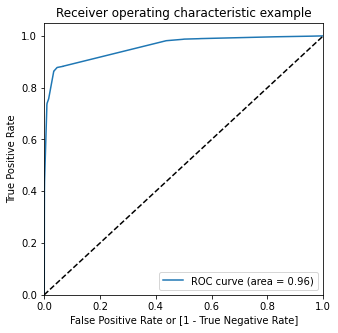

In [405]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Convert_Prob)

###  Finding Optimal Cutoff Point

In [406]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Convert_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.150551,3009,0,1,1,0,0,0,0,0,0,0,0
1,0,0.043498,1012,0,1,0,0,0,0,0,0,0,0,0
2,0,0.004800,9226,0,1,0,0,0,0,0,0,0,0,0
3,1,0.734192,4750,1,1,1,1,1,1,1,1,1,0,0
4,1,0.982825,7987,1,1,1,1,1,1,1,1,1,1,1


In [407]:
 #Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.723980  0.981603  0.562612
0.2   0.2  0.924579  0.878168  0.953649
0.3   0.3  0.925838  0.868765  0.961588
0.4   0.4  0.925838  0.868765  0.961588
0.5   0.5  0.926626  0.864677  0.965429
0.6   0.6  0.926468  0.863859  0.965685
0.7   0.7  0.926468  0.863859  0.965685
0.8   0.8  0.896709  0.757563  0.983867
0.9   0.9  0.891041  0.732216  0.990525


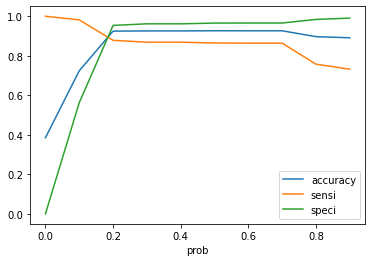

In [408]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [409]:
#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [410]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Convert_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Convert_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.150551,3009,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.043498,1012,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.004800,9226,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.734192,4750,1,1,1,1,1,1,1,1,1,0,0,1
4,1,0.982825,7987,1,1,1,1,1,1,1,1,1,1,1,1


In [411]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9258384506376949

In [412]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3755,  150],
       [ 321, 2125]], dtype=int64)

In [413]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [414]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8687653311529027

In [415]:
# Let us calculate specificity
TN / float(TN+FP)

0.9615877080665813

In [416]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.03841229193341869


In [417]:
# Positive predictive value 
print (TP / float(TP+FP))

0.9340659340659341


In [418]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9212463199214916


In [419]:
from sklearn.metrics import precision_recall_curve

In [420]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: predicted, Length: 6351, dtype: int64)

In [421]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Convert_Prob)

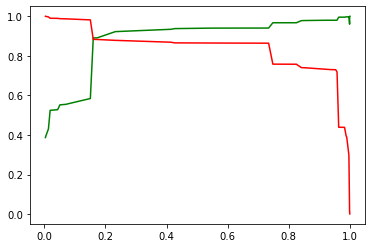

In [422]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

###  Making predictions on the test set

In [423]:
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [424]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Lead Source_Welingak Website,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,Tags_not sure,Last Notable Activity_SMS Sent
3271,0,0,0,0,0,0,0,0,1,0
1490,0,0,0,0,0,0,0,1,0,0
7936,0,0,0,0,0,0,0,0,1,0
4216,0,0,0,1,0,0,0,0,0,0
3830,0,0,0,0,0,0,0,0,1,0


In [425]:
X_test_sm = sm.add_constant(X_test)

In [426]:
y_test_pred = res.predict(X_test_sm)

In [427]:
y_test_pred

3271    0.150551
1490    0.958215
7936    0.150551
4216    0.990429
3830    0.150551
          ...   
850     0.150551
2879    0.013206
6501    0.997210
7155    0.150551
376     0.150551
Length: 2723, dtype: float64

In [428]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [429]:
# Let's see the head
y_pred_1.head()

,0
3271,0.150551
1490,0.958215
7936,0.150551
4216,0.990429
3830,0.150551


In [430]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [431]:
# Putting CustID to index
y_test_df['Lead Number'] = y_test_df.index

In [432]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [433]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [434]:
y_pred_final.head()

,Converted,Lead Number,0
0,0,3271,0.150551
1,1,1490,0.958215
2,0,7936,0.150551
3,1,4216,0.990429
4,0,3830,0.150551


In [435]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Convert_Prob'})

In [436]:
 #Rearranging the columns
#y_pred_final = y_pred_final.reindex_axis(['CustID','Churn','Churn_Prob'], axis=1)

y_pred_final = y_pred_final.reindex(['Lead Number','Converted','Convert_Prob'], axis=1)

In [437]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Lead Number,Converted,Convert_Prob
0,3271,0,0.150551
1,1490,1,0.958215
2,7936,0,0.150551
3,4216,1,0.990429
4,3830,0,0.150551


In [438]:
y_pred_final['final_predicted'] = y_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.3 else 0)

In [439]:
y_pred_final.head()

,Lead Number,Converted,Convert_Prob,final_predicted
0,3271,0,0.150551,0
1,1490,1,0.958215,1
2,7936,0,0.150551,0
3,4216,1,0.990429,1
4,3830,0,0.150551,0


In [440]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.9192067572530297

In [441]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1659,   75],
       [ 145,  844]], dtype=int64)

In [442]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [443]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8533872598584429

In [444]:
# Let us calculate specificity
TN / float(TN+FP)

0.9567474048442907

In [ ]:
#replace df.reindex_axis(.......) with df.reindex(......). Y

# calculating lead score

In [451]:
leads_test_score = y_pred_final
leads_test_score.head()

,Lead Number,Converted,Convert_Prob,final_predicted
0,3271,0,0.150551,0
1,1490,1,0.958215,1
2,7936,0,0.150551,0
3,4216,1,0.990429,1
4,3830,0,0.150551,0


In [452]:
leads_train_score = y_train_pred_final[['Lead Number','Converted','Convert_Prob','final_predicted']]
leads_train_score.head()

,Lead Number,Converted,Convert_Prob,final_predicted
0,3009,0,0.150551,0
1,1012,0,0.043498,0
2,9226,0,0.004800,0
3,4750,1,0.734192,1
4,7987,1,0.982825,1


In [ ]:
#leads_train_score= leads_train_score[['Lead Number','Converted','Convert_Prob','final_predicted']]

In [453]:
lead_score= leads_train_score.append(leads_test_score)
lead_score.head()

,Lead Number,Converted,Convert_Prob,final_predicted
0,3009,0,0.150551,0
1,1012,0,0.043498,0
2,9226,0,0.004800,0
3,4750,1,0.734192,1
4,7987,1,0.982825,1


In [449]:


#Lead_score = pd.concat([leads_train_score,leads_test_score],axis=1)

In [454]:
lead_score['Lead_Score'] = lead_score['Convert_Prob'].apply(lambda x : round(x*100))
lead_score.head()

,Lead Number,Converted,Convert_Prob,final_predicted,Lead_Score
0,3009,0,0.150551,0,15
1,1012,0,0.043498,0,4
2,9226,0,0.004800,0,0
3,4750,1,0.734192,1,73
4,7987,1,0.982825,1,98


In [455]:
lead_score.shape

(9074, 5)

## CONCLUSION
After the analysis and model building , the lead score for each customer has been generated depending on which the customer with promising lead score can be targeted.The accuracy of the model is around 92%.
